In [1]:
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

# Ames Housing Raw data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

df = pd.read_csv("..\data\AmesHousing_raw_data.csv")
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


# Análisis de la base

## Columnas e instancias

In [3]:
# Cantidad de columnas e instancias
num_columns = df.shape[1]
num_instances = df.shape[0]
print(f"Cantidad de columnas: {num_columns}")
print(f"Cantidad de instancias: {num_instances}")
# Tipo de dato de cada columna
data_types = df.dtypes
data_types

Cantidad de columnas: 82
Cantidad de instancias: 2930


Order               int64
PID                 int64
MS SubClass         int64
MS Zoning          object
Lot Frontage      float64
                   ...   
Mo Sold             int64
Yr Sold             int64
Sale Type          object
Sale Condition     object
SalePrice           int64
Length: 82, dtype: object

## Cantidad de columnas por tipo de dato

In [4]:
# Cantidad de columnas por tipo de dato
data_types.value_counts()

object     43
int64      28
float64    11
Name: count, dtype: int64

## Cantidad de Columnas e Instancias y Tipo de Dato de Cada Columna

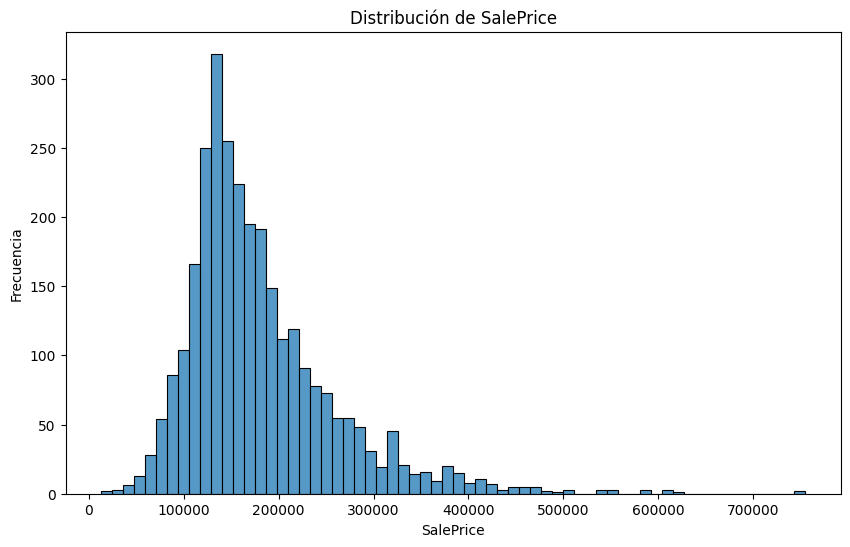

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración del gráfico
plt.figure(figsize=(10, 6))
# Gráfico de la distribución de SalePrice
sns.histplot(df["SalePrice"], bins="auto")
# Títulos y etiquetas
plt.title("Distribución de SalePrice")
plt.xlabel("SalePrice")
plt.ylabel("Frecuencia")
# Mostrar gráfico
plt.show()

## Identificación de Valores Faltantes

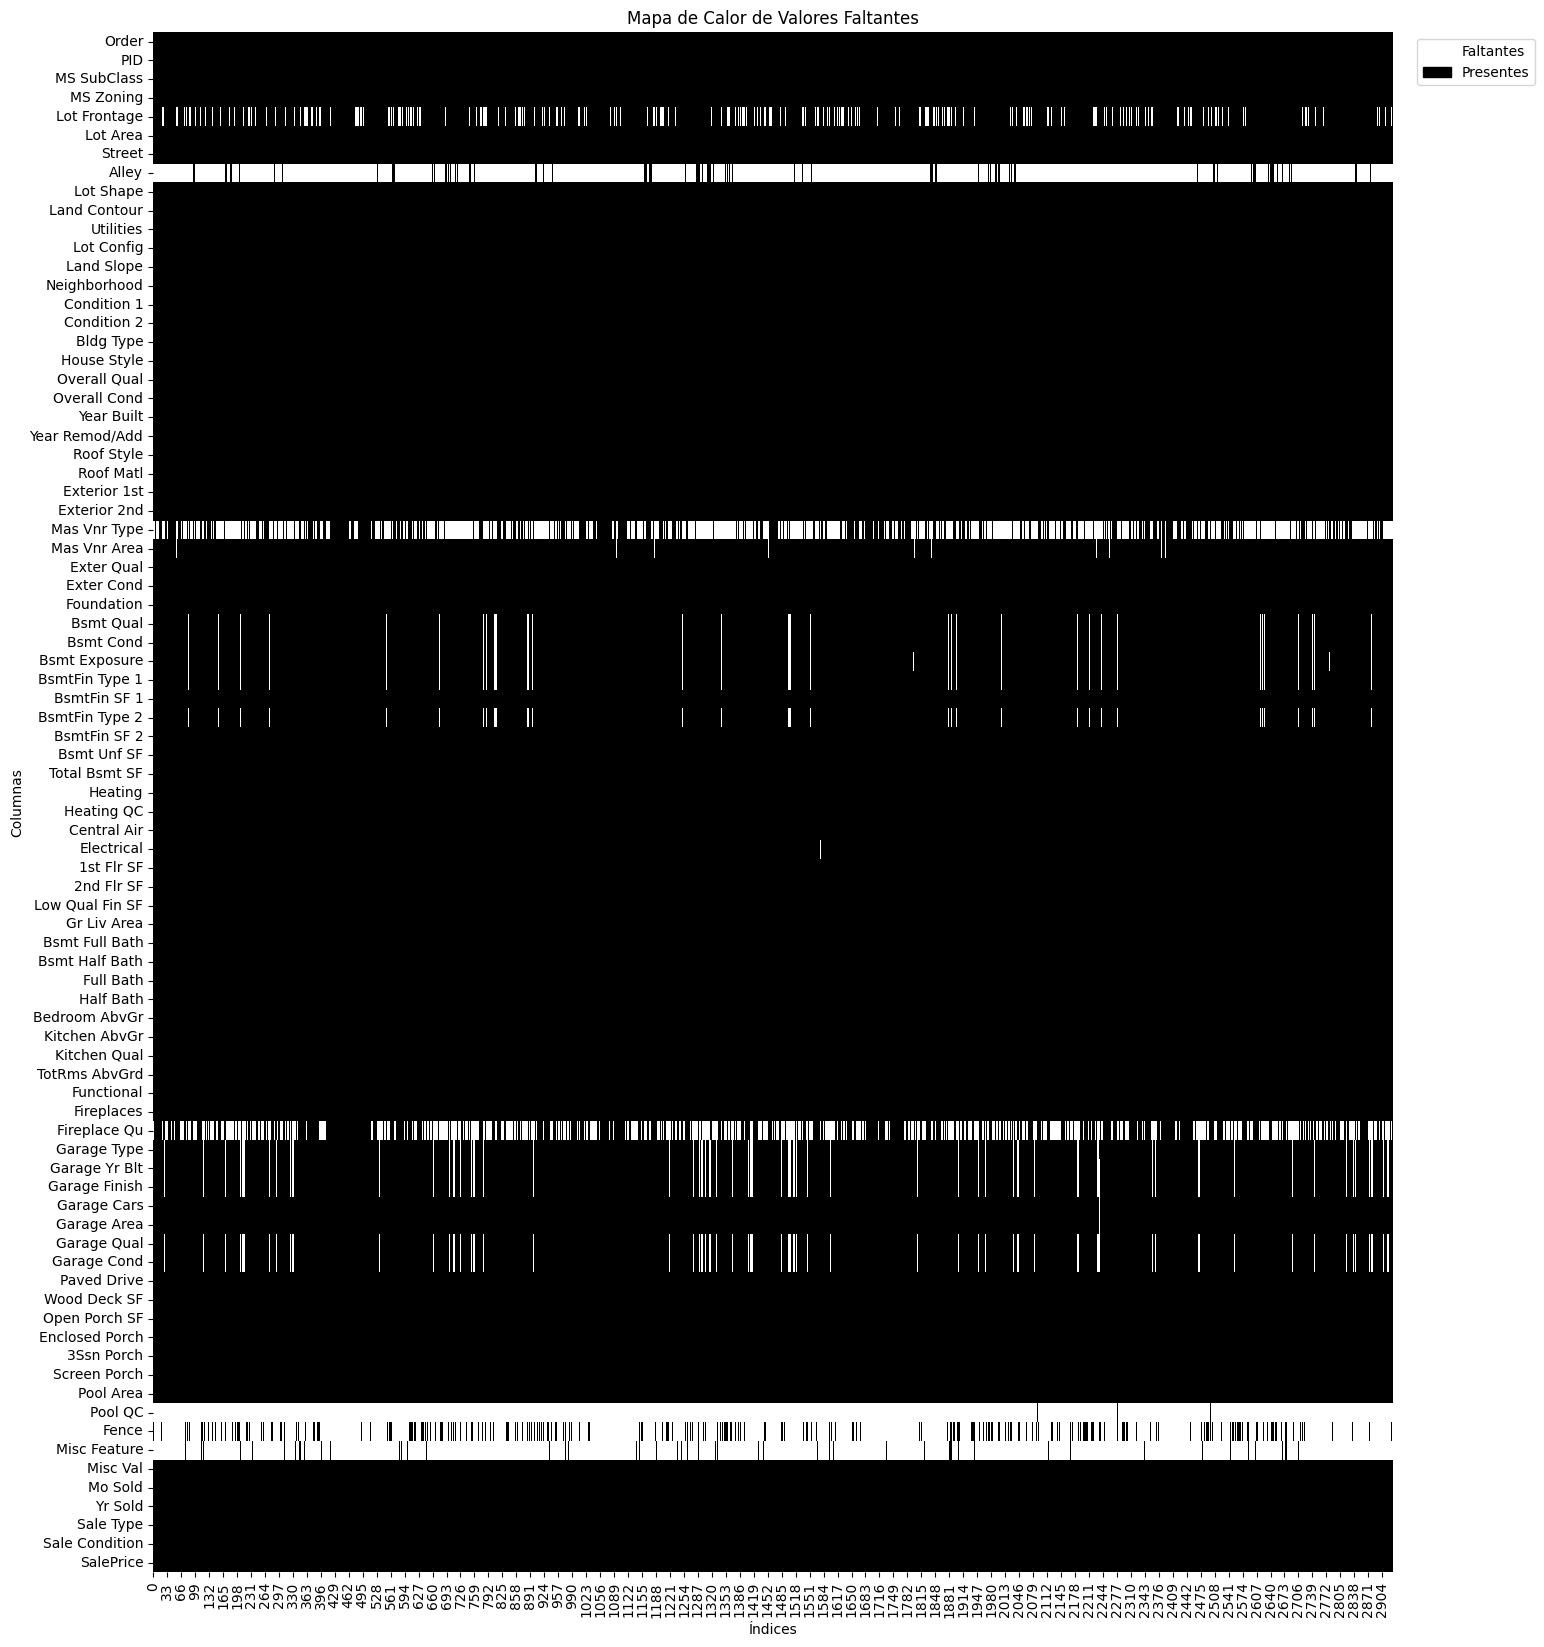

In [6]:
import matplotlib.patches as mpatches

# Mapa de calor invertido con todas las columnas y leyenda
plt.figure(figsize=(16, 20))
sns.heatmap(df.isnull().transpose(), cbar=False, cmap="binary_r", yticklabels=True)
plt.title("Mapa de Calor de Valores Faltantes")
plt.xlabel("Índices")
plt.ylabel("Columnas")

# Añadir leyenda
legend_labels = [
    mpatches.Patch(color="white", label="Faltantes"),
    mpatches.Patch(color="black", label="Presentes"),
]
plt.legend(handles=legend_labels, loc="upper right", bbox_to_anchor=(1.12, 1))
plt.show()

# Rango de las columnas

In [7]:
# Obtener columnas numéricas
numeric_cols = df.select_dtypes(include=["number"]).columns
# Calcular y mostrar rangos
ranges = df[numeric_cols].agg(["min", "max"])
ranges

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
min,1,526301100,20,21.0,1300,1,1,1872,1950,0.0,...,0,0,0,0,0,0,0,1,2006,12789
max,2930,1007100110,190,313.0,215245,10,9,2010,2010,1600.0,...,1424,742,1012,508,576,800,17000,12,2010,755000


# Matriz de correlación

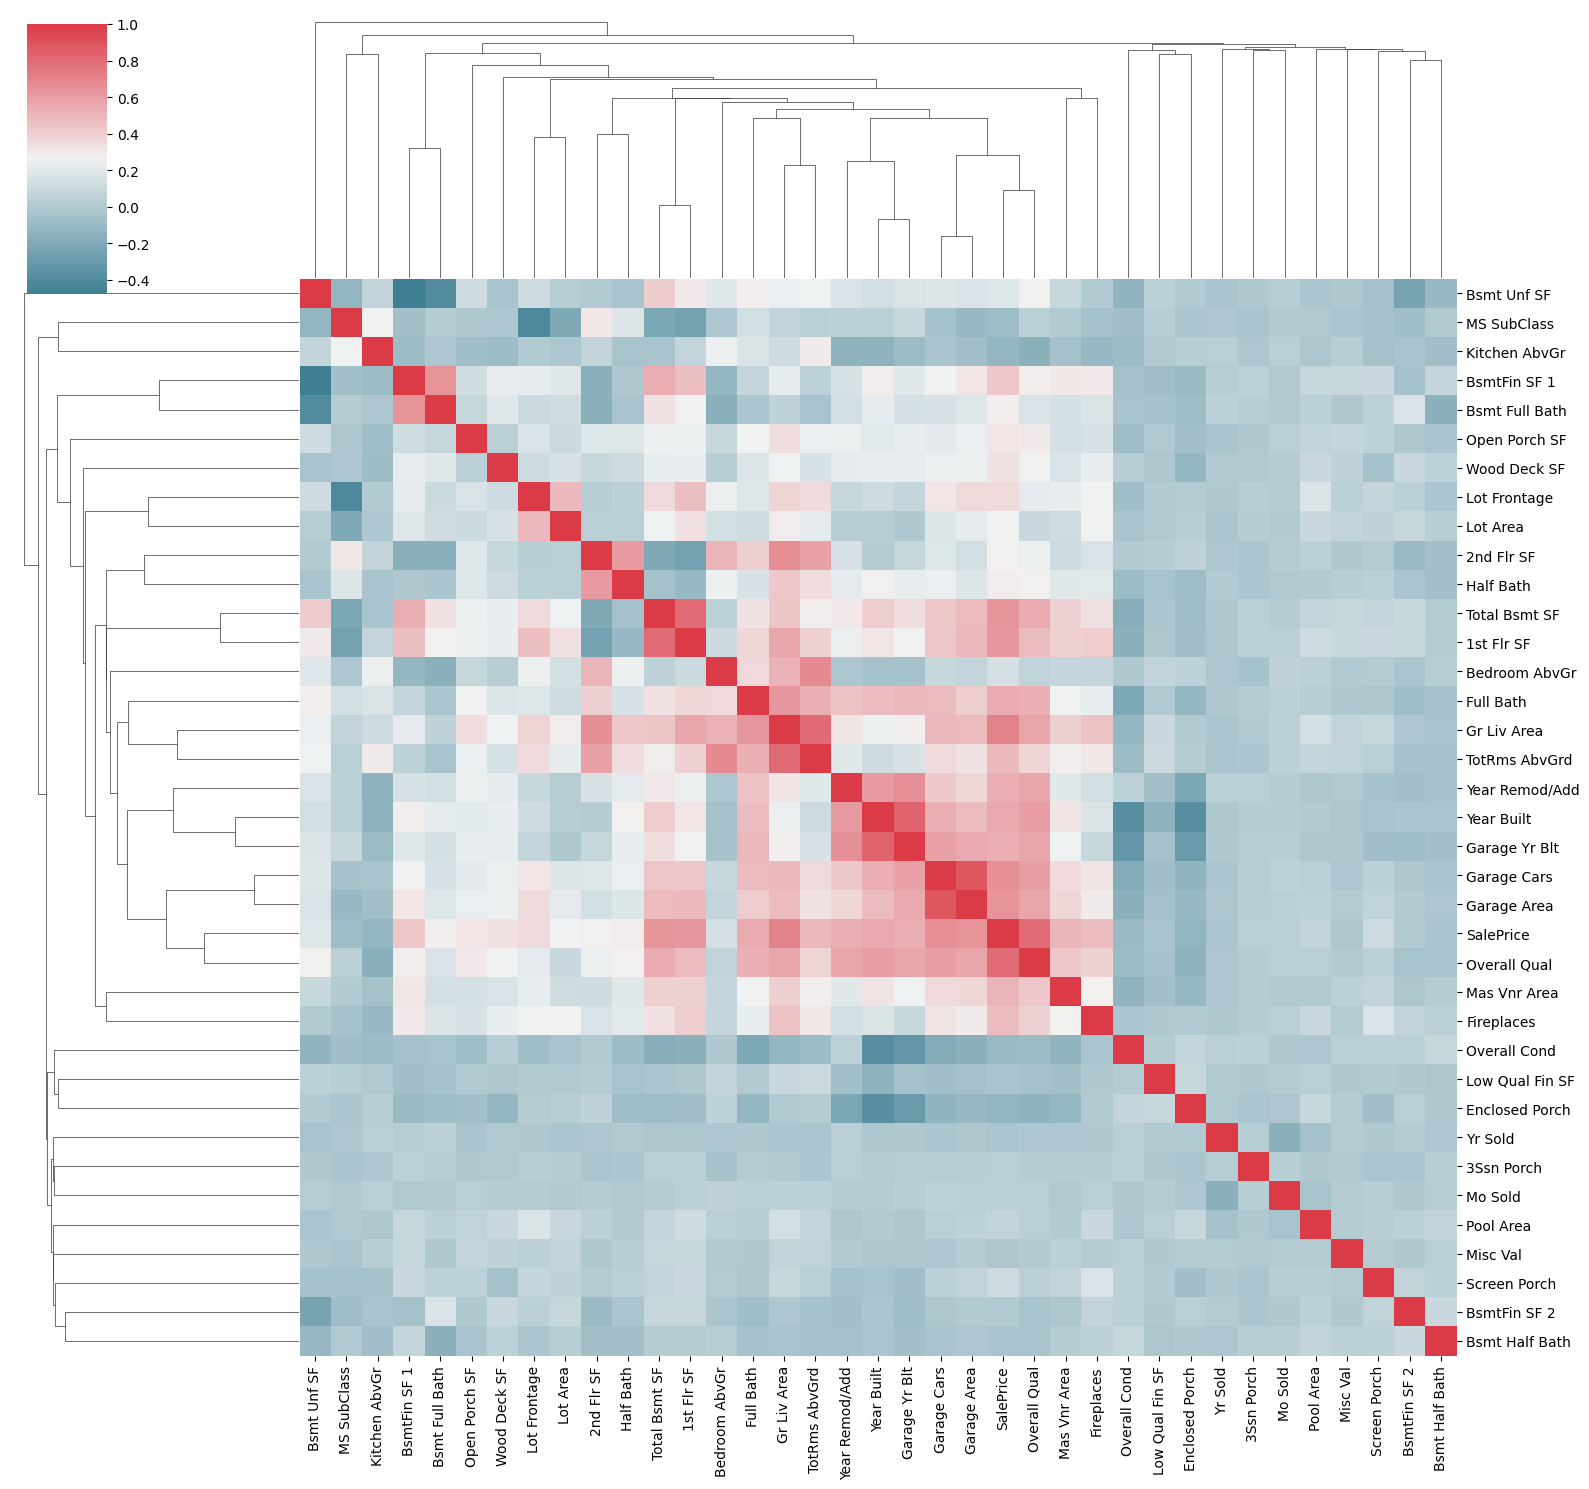

In [8]:
def grupo_de_variables():
    variables_numericos = df.select_dtypes(include=["int64", "float64"]).columns
    variables_numericos = variables_numericos.drop(
        ["Order", "PID", "SalePrice"]
    )  # drop Order, PID, SalePrice
    variables_categoricos = df.select_dtypes(include=["object"]).columns
    return list(variables_numericos), list(variables_categoricos)


variables_numericos, variables_categoricos = grupo_de_variables()
corr = df[["SalePrice"] + variables_numericos].corr()

cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Gráfica de clustermap
sns.clustermap(
    corr, cmap=cmap, method="single", figsize=(16, 15)  # Método de agrupamiento
)
plt.show()

La matriz de correlación es una herramienta invaluable para comprender las variables y sus relaciones. Por ejemplo, nos permite identificar las relaciones más fuertes con la variable de interés, que en este caso es 'SalePrice'. Al analizar la matriz, destacamos que las variables 'Gr Liv Area', 'Total Bsmt SF' y 'Overall Qual' presentan correlaciones significativas con 'SalePrice'.

# Grafica de barras de correlacion entre todas las variables y 'SalePrice'

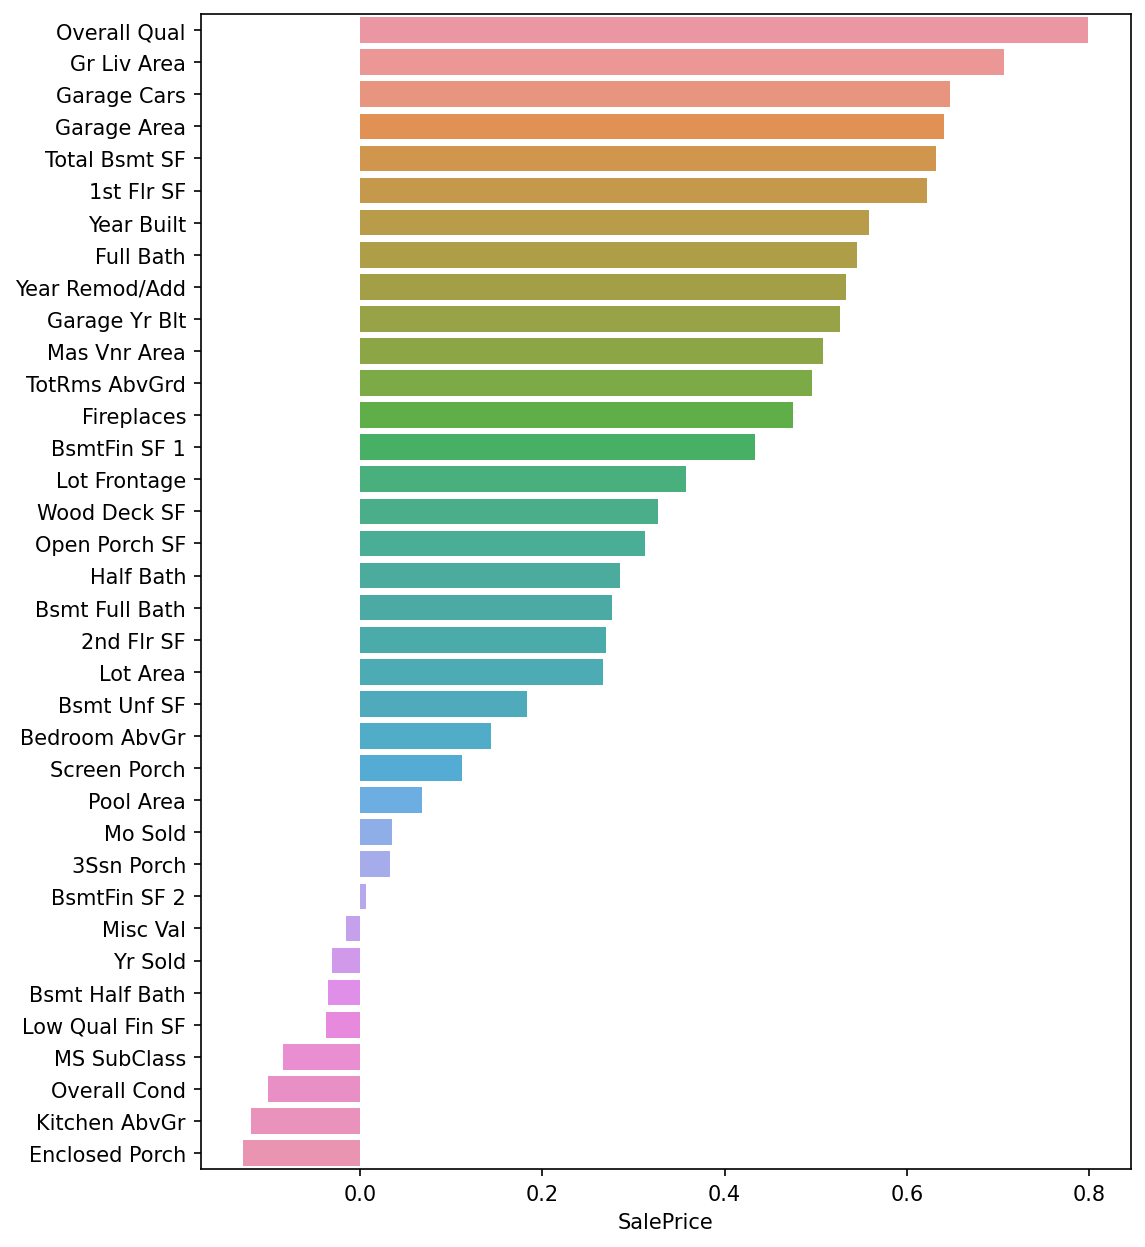

In [9]:
corr = corr.sort_values("SalePrice", ascending=False)
plt.figure(figsize=(8, 10), dpi=150)
sns.barplot(x=corr.SalePrice[1:], y=corr.index[1:], orient="h")
plt.show()

# Relación de Sale Price con variables numericas

Diagrama de disperción de el precio de venta con superficie habitable por encima del nivel del suelo en pies cuadrados

<Axes: xlabel='Gr Liv Area', ylabel='SalePrice'>

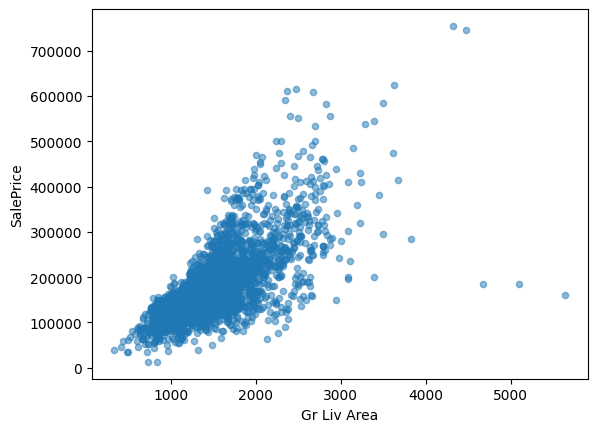

In [10]:
# Diagrama de disperción Gr Liv Area / SalePrice
data = pd.concat([df["SalePrice"], df["Gr Liv Area"]], axis=1)
data.plot.scatter(x="Gr Liv Area", y="SalePrice", alpha=0.5)

Diagrama de disperción de el precio de venta con pies cuadrados totales del sótano

<Axes: xlabel='Total Bsmt SF', ylabel='SalePrice'>

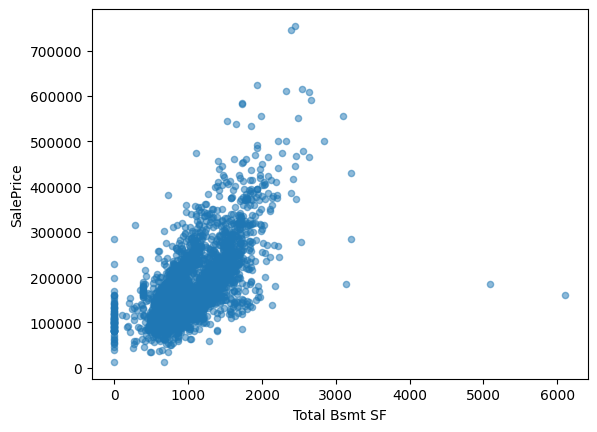

In [11]:
# Diagrama de disperción Total Bsmt SF / SalePrice
data = pd.concat([df["SalePrice"], df["Total Bsmt SF"]], axis=1)
data.plot.scatter(x="Total Bsmt SF", y="SalePrice", alpha=0.5)

Mediante el uso de diagramas de dispersión, podemos observar que 'Gr Liv Area' y 'Total Bsmt SF' mantienen una relación lineal positiva con nuestra variable de interés, 'SalePrice', ya que aumentan en la misma dirección. Además, es evidente que las pendientes de estas relaciones son significativas, lo que resalta su importancia

# Relación con variables categoricas



Diagrama de cajas calidad general del material y del acabado con precio de venta

(-0.5, 9.5, 0.0, 800000.0)

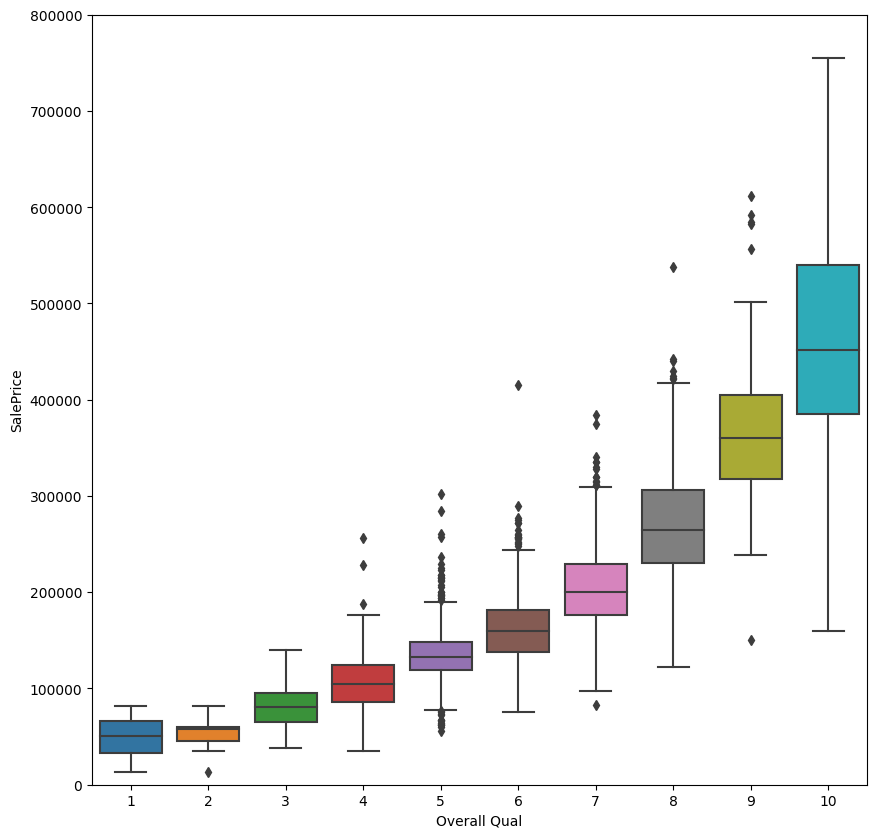

In [16]:
# Diagrama de cajas Overall Qual/SalePrice
data = pd.concat([df["SalePrice"], df["Overall Qual"]], axis=1)
f, ax = plt.subplots(figsize=(10, 10))
fig = sns.boxplot(x="Overall Qual", y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)

Diagrama de cajas año de construcción con precio de venta

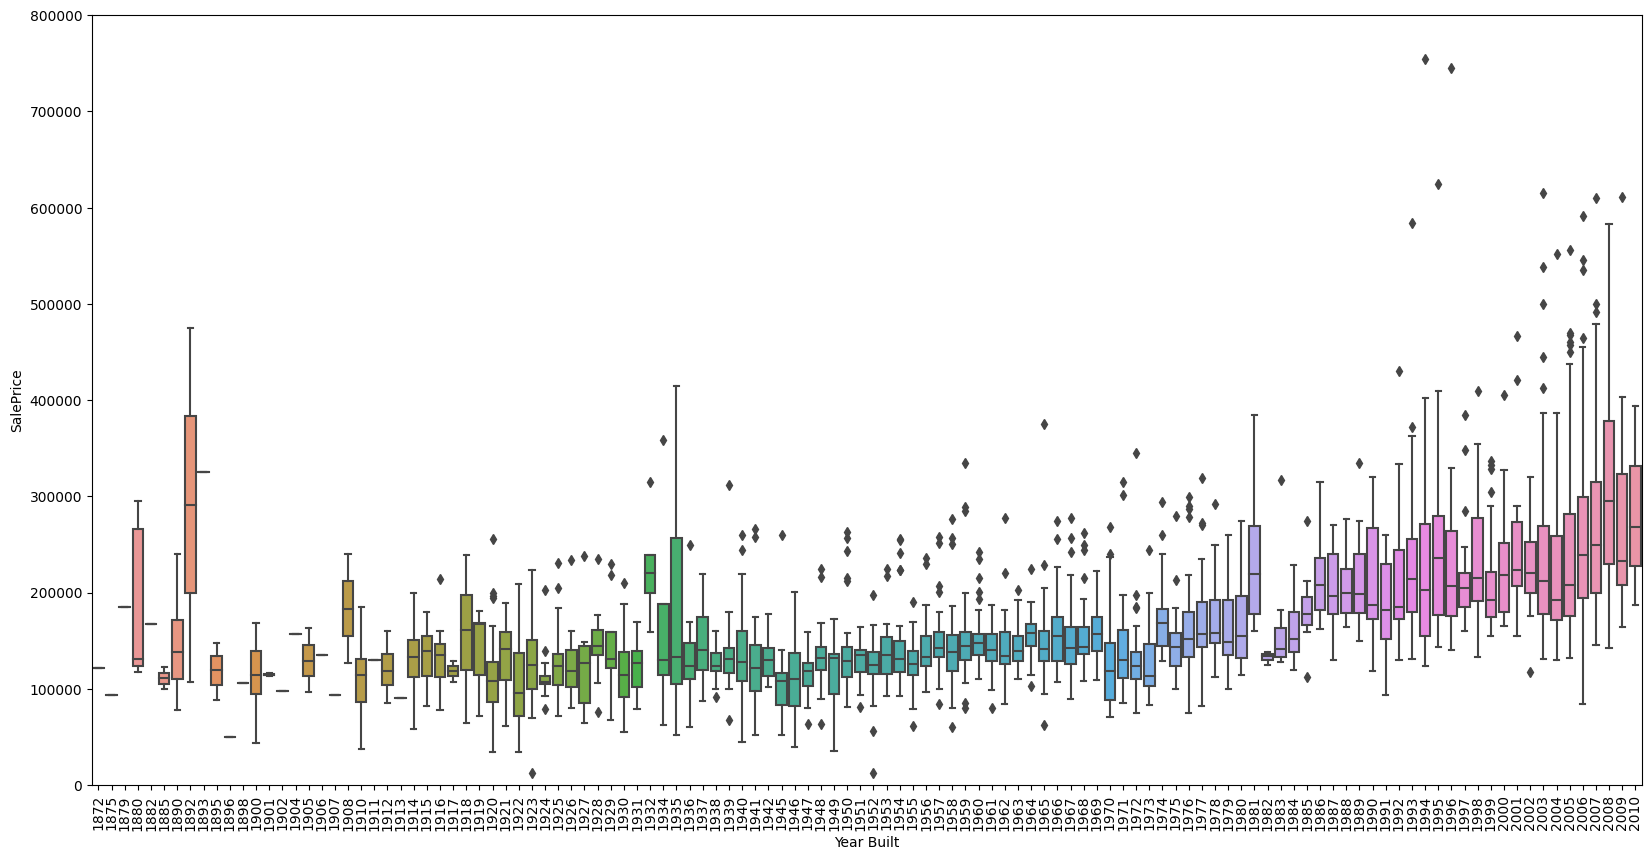

In [15]:
plt.subplots(figsize=(20, 10))
fig = sns.boxplot(x="Year Built", y="SalePrice", data=data)
fig.set_xticklabels(fig.get_xticklabels(), rotation=90)
fig.axis(ymin=0, ymax=800000)
plt.show()

Mediante el uso de diagramas de caja (BoxPlots), podemos examinar la relación de las variables categóricas con 'SalePrice'. En este caso, analizamos las variables 'Overall Qual' y 'Year Built'. Observamos que 'Overall Qual' muestra una relación más fuerte con el precio de venta, lo que sugiere una influencia significativa en el mismo